# 결정트리

: 정보의 '균일성'이라는 룰을 기반으로 하는 쉽고 직관적인 알고리즘

## 설정하면 더 간단한 결정트리를 만드는 하이퍼 파라미터
- max_depth : 결정 트리의 최대 깊이
- min_samples_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
- min_samples_leaf : 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값

## 결정트리의 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier를 제공해 결정 트리 모델의 학습과 예측을 수행
dt_clf = DecisionTreeClassifier()

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=100)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [2]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

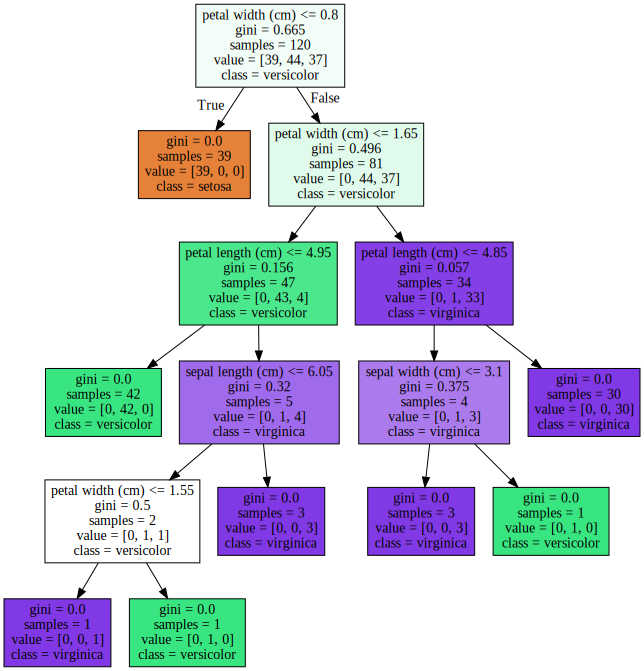

In [3]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 브랜치 노드 : 자식노드가 있는 노드, 자식노드를 만들기 위한 분할 규칙을 가지고 있음
- 리프 노드 : 자식노드가 없는 노드
    - 오직 하나의 클래스 값으로 최종 데이터가 구성
    - 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족

Feature importances:
[0.0075 0.0188 0.0772 0.8965]
sepal length (cm) : 0.0075
sepal width (cm) : 0.0188
petal length (cm) : 0.0772
petal width (cm) : 0.8965


<AxesSubplot:>

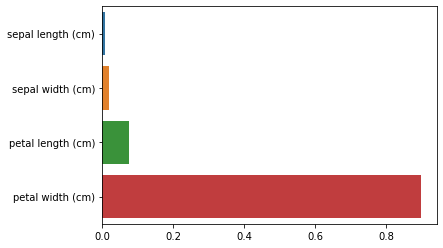

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:")
print(np.round(dt_clf.feature_importances_,4))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.4f}".format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정트리 과적합

## 결정트리 실습

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
    
feature_name_df = pd.read_csv("./datasets/human_activity/features.txt", sep="\s+",\
                             header=None, names=["column_index", "column_name"])
feature_name= feature_name_df.iloc[:,1].values.tolist()
print("전체 피처명에서 10개만 추출 :", feature_name[:10])
feature_name_df.head(3)

전체 피처명에서 10개만 추출 : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z


In [24]:
feature_dup_df = feature_name_df.groupby("column_name").count()
print(feature_dup_df[feature_dup_df["column_index"]>1].count())
feature_dup_df[feature_dup_df["column_index"]>1].head(10)

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [31]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(old_feature_name_df.groupby("column_name").cumcount(),
                                  columns=["dup_cnt"])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how="outer")
    new_feature_name_df["column_name"] = new_feature_name_df[["column_name","dup_cnt"]].apply(lambda x: x[0]+'_'+str(x[1])
                                                                                              if x[1]>0 else x[0], axis=1)
    new_feature_name_df= new_feature_name_df.drop(["index"],axis=1)
    return new_feature_name_df

In [32]:
def get_human_dataset():
    feature_name_df = pd.read_csv("./datasets/human_activity/features.txt", sep="\s+",\
                             header=None, names=["column_index", "column_name"])
    
    feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name= feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv("./datasets/human_activity/train/X_train.txt",sep="\s+",
                     names = feature_name)
    X_test = pd.read_csv("./datasets/human_activity/test/X_test.txt",sep="\s+",
                     names = feature_name)
    y_train = pd.read_csv("./datasets/human_activity/train/y_train.txt",sep="\s+",
                     header=None,names = ["action"])
    y_test = pd.read_csv("./datasets/human_activity/test/y_test.txt",sep="\s+",
                     header=None,names = ["action"])
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train, y_test = get_human_dataset()

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [34]:
y_train["action"].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [36]:
X_train.isna().sum().sum()

0

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도 : {0:.4f}".format(accuracy))

print("DecisionTreeClassifier 기본 하이퍼 파라미터 : \n", dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [38]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": [ 6, 8 ,10, 12, 16 ,20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring="accuracy", cv=5,verbose=1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최고 평균 정확도 수치:{0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  3.1min finished


GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [39]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[["param_max_depth","mean_test_score"]]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [42]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth": [ 6, 8 ,10, 12, 16 ,20, 24],
         "min_samples_split":[16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring="accuracy", cv=5,verbose=1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최고 평균 정확도 수치:{0:.4f}".format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  6.3min finished


GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [43]:
best_df_clf = grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print("결정 트리 예측 정확도 : {0:.4f}".format(accuracy))

결정 트리 예측 정확도 : 0.8717


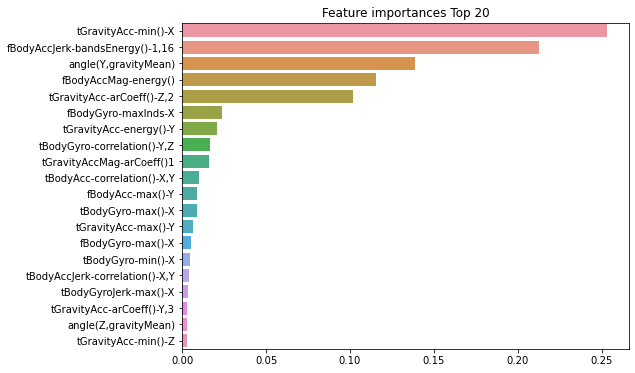

In [47]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
ftr_importances= pd.Series(ftr_importances_values,index=X_train.columns)

ftr_top20= ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()